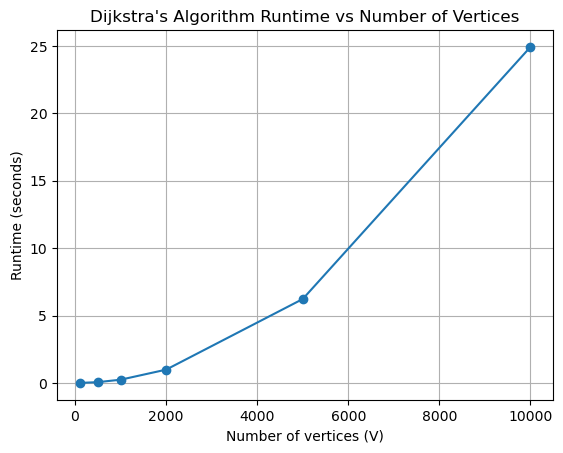

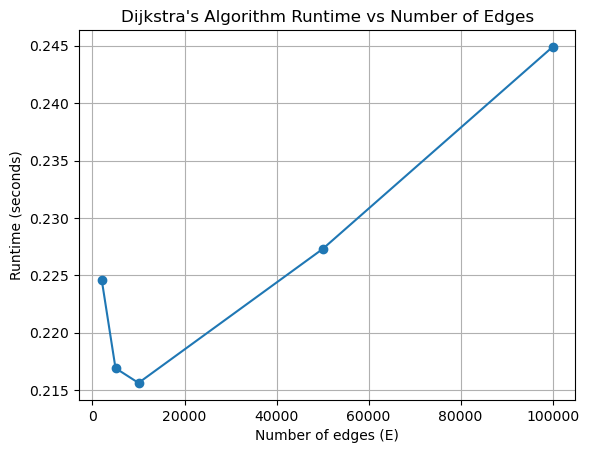

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Dijkstra's algorithm (array-based priority queue and adjacency matrix)
def dijkstra(graph, src):
    V = len(graph)
    dist = [float('inf')] * V
    dist[src] = 0
    visited = [False] * V

    for _ in range(V):
        u = min_distance(dist, visited)
        visited[u] = True

        for v in range(V):
            if graph[u][v] > 0 and not visited[v] and dist[u] != float('inf') and dist[u] + graph[u][v] < dist[v]:
                dist[v] = dist[u] + graph[u][v]
    return dist

# Utility function to find the vertex with the smallest distance
def min_distance(dist, visited):
    min_val = float('inf')
    min_index = -1
    for v in range(len(dist)):
        if dist[v] < min_val and not visited[v]:
            min_val = dist[v]
            min_index = v
    return min_index

# Generate a random graph with V vertices and E edges
def generate_random_graph(V, E):
    graph = np.zeros((V, V))
    edge_count = 0
    while edge_count < E:
        u = np.random.randint(0, V)
        v = np.random.randint(0, V)
        if u != v and graph[u][v] == 0:  # Prevent duplicate edges
            weight = np.random.randint(1, 10)
            graph[u][v] = weight
            graph[v][u] = weight  # Undirected graph
            edge_count += 1
    return graph

# Empirical analysis for varying number of vertices
def run_time_vs_vertices():
    vertices = [100, 500, 1000, 2000, 5000, 10000]  # Varying number of vertices
    times = []

    for V in vertices:
        E = V * (V - 1) // 10  # Keeping edge density roughly proportional to V
        graph = generate_random_graph(V, E)
        src = 0
        
        start_time = time.time()
        dijkstra(graph, src)
        end_time = time.time()
        
        times.append(end_time - start_time)
    
    plt.plot(vertices, times, marker='o')
    plt.xlabel('Number of vertices (V)')
    plt.ylabel('Runtime (seconds)')
    plt.title('Dijkstra\'s Algorithm Runtime vs Number of Vertices')
    plt.grid(True)
    plt.show()

# Empirical analysis for varying number of edges
def run_time_vs_edges():
    V = 1000  # Fixed number of vertices
    edges = [V * 2, V * 5, V * 10, V * 50, V * 100]  # Varying number of edges
    times = []

    for E in edges:
        graph = generate_random_graph(V, E)
        src = 0
        
        start_time = time.time()
        dijkstra(graph, src)
        end_time = time.time()
        
        times.append(end_time - start_time)
    
    plt.plot(edges, times, marker='o')
    plt.xlabel('Number of edges (E)')
    plt.ylabel('Runtime (seconds)')
    plt.title('Dijkstra\'s Algorithm Runtime vs Number of Edges')
    plt.grid(True)
    plt.show()

# Run both analyses
run_time_vs_vertices()
run_time_vs_edges()
